In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, json, time
from tqdm.notebook import tqdm_notebook

In [2]:
import glob
# Use glob to get all filepaths that match the pattern (*=wildcard)
tmdb_files = sorted(glob.glob("Data/final_tmdb_data*.csv.gz"))
tmdb_files

['Data\\final_tmdb_data_2002.csv.gz']

In [3]:
# Use read_csv in a list comprehension and combine with concat to load all files
df = pd.concat([pd.read_csv(f) for f in tmdb_files] )
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,...,0.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Crime and Punishment,0.0,5.400,13.0,NaN
2,tt0118926,0.0,/qR3Dk3ctnrrxkAI6I472RhamIbu.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,...,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.200,51.0,NaN
3,tt0119980,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,563364.0,en,Random Shooting in LA,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Random Shooting in LA,0.0,0.000,0.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.422,1918.0,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,tt6801910,0.0,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,339829.0,ta,தமிழ்,...,0.0,145.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Thamizh,0.0,6.000,1.0,NaN
1390,tt7758748,0.0,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 9648, 'na...",https://www.imvbox.com/en/movies/look-at-me-be...,1045181.0,fa,به من نگاه کن,...,0.0,122.0,"[{'english_name': 'Persian', 'iso_639_1': 'fa'...",Released,Director: Shahram Assadi,Look at Me 2002,0.0,0.000,0.0,NaN
1391,tt8302928,0.0,NaN,NaN,0.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,866533.0,el,Movie Toons: Treasure Island,...,0.0,0.0,[],Released,NaN,Movie Toons: Treasure Island,0.0,0.000,0.0,NaN
1392,tt8474326,0.0,NaN,NaN,0.0,[],NaN,292027.0,en,Skin Eating Jungle Vampires,...,0.0,0.0,[],Released,NaN,Skin Eating Jungle Vampires,0.0,0.000,0.0,NaN


In [4]:
df.shape

(1394, 26)

In [5]:
df.head()

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0096056,0.0,/95U3MUDXu4xSCmVLtWgargRipDi.jpg,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,109809.0,en,Crime and Punishment,...,0.0,126.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Crime and Punishment,0.0,5.400,13.0,NaN
2,tt0118926,0.0,/qR3Dk3ctnrrxkAI6I472RhamIbu.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,...,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.200,51.0,NaN
3,tt0119980,0.0,NaN,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,563364.0,en,Random Shooting in LA,...,0.0,91.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,NaN,Random Shooting in LA,0.0,0.000,0.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.422,1918.0,R


How many movies had at least some valid financial information (values > 0 for budget OR revenue)?

Answer: 390

In [6]:
df = df[(df['budget'] > 0) | (df['revenue'] > 0)]
df

,imdb_id,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,original_language,original_title,...,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,certification
2,tt0118926,0.0,/qR3Dk3ctnrrxkAI6I472RhamIbu.jpg,NaN,0.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,20689.0,en,The Dancer Upstairs,...,5227348.0,132.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"An honest man caught in a world of intrigue, p...",The Dancer Upstairs,0.0,6.200,51.0,NaN
4,tt0120679,0.0,/s04Ds4xbJU7DzeGVyamccH4LoxF.jpg,NaN,12000000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",https://www.miramax.com/movie/frida,1360.0,en,Frida,...,56298474.0,123.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Prepare to be seduced.,Frida,0.0,7.422,1918.0,R
5,tt0120804,0.0,/5pGWjnM62Zs0S1xRf3TDL1Xizr.jpg,"{'id': 17255, 'name': 'Resident Evil Collectio...",33000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 28, 'nam...",https://www.sonypictures.com/movies/residentevil,1576.0,en,Resident Evil,...,103000000.0,100.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A secret experiment. A deadly virus. A fatal m...,Resident Evil,0.0,6.600,5886.0,R
7,tt0120912,0.0,/o1l6OCqA3pYDZHIc5L1s7CEzCMv.jpg,"{'id': 86055, 'name': 'Men In Black Collection...",140000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",https://www.sonypictures.com/movies/meninblackii,608.0,en,Men in Black II,...,445135288.0,88.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Back in black.,Men in Black II,0.0,6.400,9349.0,PG-13
8,tt0121765,0.0,/abwxHfymXGAbbH3lo9PDEJEfvtW.jpg,"{'id': 10, 'name': 'Star Wars Collection', 'po...",120000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",NaN,1894.0,en,Star Wars: Episode II - Attack of the Clones,...,649398328.0,142.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,A Jedi Shall Not Know Anger. Nor Hatred. Nor L...,Star Wars: Episode II - Attack of the Clones,0.0,6.554,12438.0,PG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,tt0997084,0.0,/A9Yy4ZRJgTXlKa1KOV92YLTCppn.jpg,"{'id': 23456, 'name': 'One Piece Collection', ...",0.0,"[{'id': 28, 'name': 'Action'}, {'id': 16, 'nam...",https://one-piece.com/comicsanime/movie/detail...,44725.0,ja,ワンピース 珍獣島のチョッパー王国,...,13107237.0,56.0,"[{'english_name': 'Japanese', 'iso_639_1': 'ja...",Released,"Tony T. Chopper, the new Animal King!",One Piece: Chopper's Kingdom on the Island of ...,0.0,6.800,166.0,PG-13
1319,tt1039983,0.0,/7B5IQdNNyNsSwBaW9zzCT9XmAcJ.jpg,NaN,500000.0,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,69419.0,ta,ரெட்,...,500000.0,157.0,"[{'english_name': 'Tamil', 'iso_639_1': 'ta', ...",Released,NaN,Red,0.0,5.100,7.0,NaN
1323,tt11790094,0.0,NaN,NaN,2000.0,"[{'id': 27, 'name': 'Horror'}]",NaN,973480.0,en,Dracula Vs Frankenstein,...,0.0,81.0,[],Released,The legendary lost underground cult horror com...,Dracula Vs Frankenstein,0.0,10.000,1.0,NaN
1325,tt11841078,0.0,NaN,NaN,1000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",NaN,401067.0,en,Fatal Possession,...,0.0,78.0,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,"Her Passion Is High, Her Touch Is Deadly.",Fatal Possession,0.0,0.000,0.0,NaN


How many movies are there in each of the certification categories (G/PG/PG-13/R)?

<Axes: xlabel='certification', ylabel='Count'>

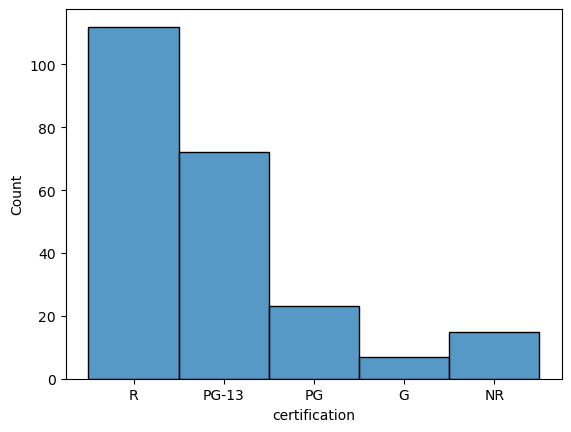

In [7]:
sns.histplot(data=df, x='certification')

What is the average revenue per certification category?

<Axes: xlabel='certification', ylabel='revenue'>

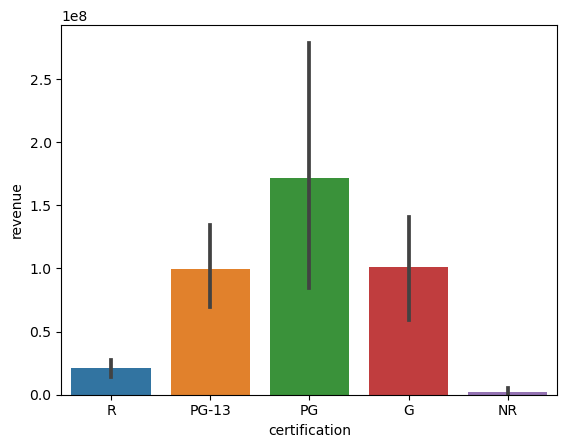

In [9]:
sns.barplot(data=df, x='certification', y='revenue')

What is the average budget per certification category?

<Axes: xlabel='certification', ylabel='budget'>

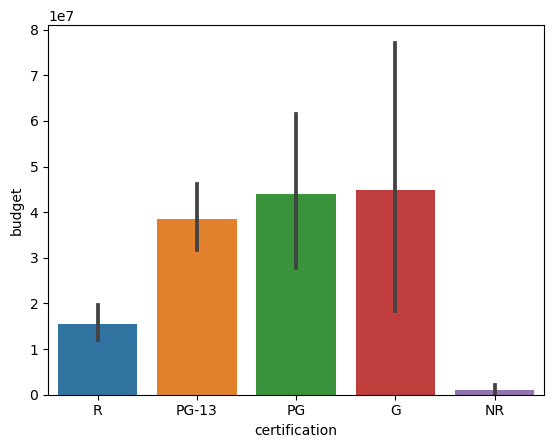

In [10]:
sns.barplot(data=df, x='certification', y='budget')